In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as plx
import os

In [4]:
df=pd.read_csv('Car details v3.csv')

In [5]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 586.8+ KB


In [9]:
df.describe()

year  selling_price     km_driven        seats
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000
mean   2013.983936   6.498137e+05  6.918866e+04     5.416393
std       3.863695   8.135827e+05  5.679230e+04     0.959208
min    1994.000000   2.999900e+04  1.000000e+00     2.000000
25%    2012.000000   2.700000e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.900000e+05  9.542500e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [10]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 586.8+ KB


In [12]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [13]:
feat = [ 'year', 'fuel', 'seller_type','transmission', 'owner','seats']
df_feat = df[[ 'fuel', 'seller_type','transmission', 'owner','seats']]


In [14]:
for i in df_feat :
    print(df_feat[i].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]


In [15]:
df.drop(df.index[df['owner']=='Test Drive Car'],inplace=True)

In [16]:
df[df['owner']=='Test Drive Car']

Empty DataFrame
Columns: [name, year, selling_price, km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, torque, seats]
Index: []

In [17]:
print(df_feat['owner'].unique())

['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


In [18]:
df.shape

(7901, 13)

In [19]:
df[['seats']] = df[['seats']].fillna(0.0).astype(int)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7901 non-null   object
 1   year           7901 non-null   int64 
 2   selling_price  7901 non-null   int64 
 3   km_driven      7901 non-null   int64 
 4   fuel           7901 non-null   object
 5   seller_type    7901 non-null   object
 6   transmission   7901 non-null   object
 7   owner          7901 non-null   object
 8   mileage        7901 non-null   object
 9   engine         7901 non-null   object
 10  max_power      7901 non-null   object
 11  torque         7901 non-null   object
 12  seats          7901 non-null   int32 
dtypes: int32(1), int64(3), object(9)
memory usage: 555.5+ KB


<Figure size 720x288 with 0 Axes>

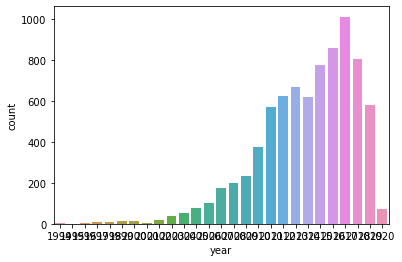

<Figure size 720x288 with 0 Axes>

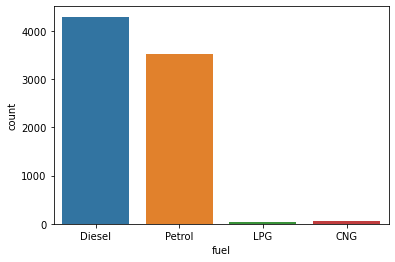

<Figure size 720x288 with 0 Axes>

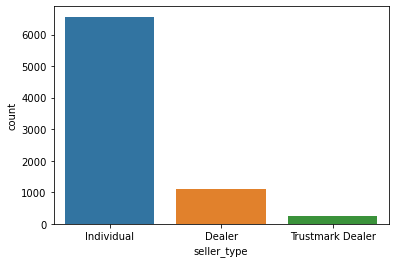

<Figure size 720x288 with 0 Axes>

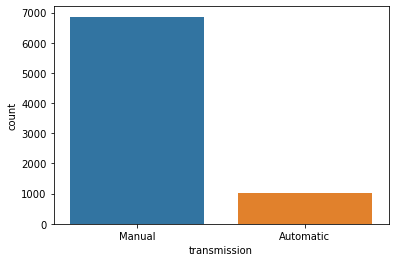

<Figure size 720x288 with 0 Axes>

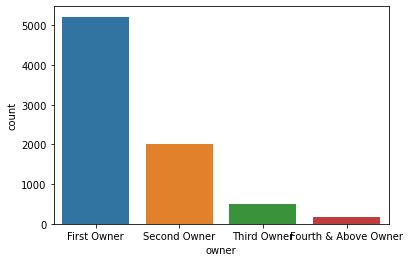

<Figure size 720x288 with 0 Axes>

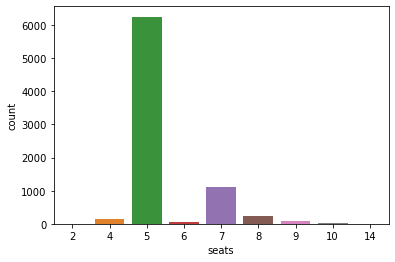

In [21]:
for i in range(len(feat)) :
    plt.figure(figsize=[10,4])
    plt.figure()
    sns.countplot(x=feat[i],data=df)
    plt.show()
    i += 1

In [22]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm      5  
1       250Nm@ 1500-2500rpm      5  
2     12.7@ 2,700(kgm@ rpm)      5  
3  22.4 kgm at 1750-2750rpm      5  
4     11.5@ 4,500(kgm@ rpm)      5

In [23]:
df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 7901, dtype: object

In [24]:
df['mileage'].dtype

dtype('O')

In [25]:
df['mileage']=df['mileage'].str.replace(' kmpl','')

In [26]:
df['mileage']=df['mileage'].str[0:5].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   year           7901 non-null   int64  
 2   selling_price  7901 non-null   int64  
 3   km_driven      7901 non-null   int64  
 4   fuel           7901 non-null   object 
 5   seller_type    7901 non-null   object 
 6   transmission   7901 non-null   object 
 7   owner          7901 non-null   object 
 8   mileage        7901 non-null   float64
 9   engine         7901 non-null   object 
 10  max_power      7901 non-null   object 
 11  torque         7901 non-null   object 
 12  seats          7901 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(8)
memory usage: 842.4+ KB


In [28]:
df['engine']=df['engine'].str.replace('CC','').astype(int)

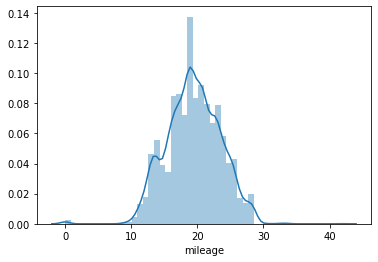

In [29]:
sns.distplot(df['mileage'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   year           7901 non-null   int64  
 2   selling_price  7901 non-null   int64  
 3   km_driven      7901 non-null   int64  
 4   fuel           7901 non-null   object 
 5   seller_type    7901 non-null   object 
 6   transmission   7901 non-null   object 
 7   owner          7901 non-null   object 
 8   mileage        7901 non-null   float64
 9   engine         7901 non-null   int32  
 10  max_power      7901 non-null   object 
 11  torque         7901 non-null   object 
 12  seats          7901 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 842.4+ KB


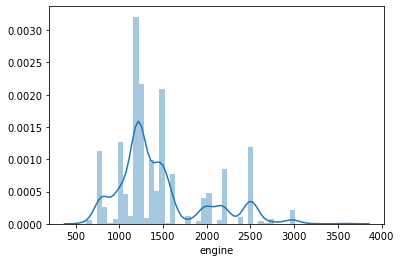

In [31]:
sns.distplot(df['engine'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   year           7901 non-null   int64  
 2   selling_price  7901 non-null   int64  
 3   km_driven      7901 non-null   int64  
 4   fuel           7901 non-null   object 
 5   seller_type    7901 non-null   object 
 6   transmission   7901 non-null   object 
 7   owner          7901 non-null   object 
 8   mileage        7901 non-null   float64
 9   engine         7901 non-null   int32  
 10  max_power      7901 non-null   object 
 11  torque         7901 non-null   object 
 12  seats          7901 non-null   int32  
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 842.4+ KB


In [33]:
df['no_years'] = 2021

In [34]:
df['no_years'] = 2021 - df['year']

In [35]:
df['max_power']=df['max_power'].str.replace('bhp','').astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   year           7901 non-null   int64  
 2   selling_price  7901 non-null   int64  
 3   km_driven      7901 non-null   int64  
 4   fuel           7901 non-null   object 
 5   seller_type    7901 non-null   object 
 6   transmission   7901 non-null   object 
 7   owner          7901 non-null   object 
 8   mileage        7901 non-null   float64
 9   engine         7901 non-null   int32  
 10  max_power      7901 non-null   float64
 11  torque         7901 non-null   object 
 12  seats          7901 non-null   int32  
 13  no_years       7901 non-null   int64  
dtypes: float64(2), int32(2), int64(4), object(6)
memory usage: 935.0+ KB


In [37]:
df.drop('torque',axis=1,inplace=True)

In [38]:
df.drop('year',axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   selling_price  7901 non-null   int64  
 2   km_driven      7901 non-null   int64  
 3   fuel           7901 non-null   object 
 4   seller_type    7901 non-null   object 
 5   transmission   7901 non-null   object 
 6   owner          7901 non-null   object 
 7   mileage        7901 non-null   float64
 8   engine         7901 non-null   int32  
 9   max_power      7901 non-null   float64
 10  seats          7901 non-null   int32  
 11  no_years       7901 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 842.4+ KB


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   selling_price  7901 non-null   int64  
 2   km_driven      7901 non-null   int64  
 3   fuel           7901 non-null   object 
 4   seller_type    7901 non-null   object 
 5   transmission   7901 non-null   object 
 6   owner          7901 non-null   object 
 7   mileage        7901 non-null   float64
 8   engine         7901 non-null   int32  
 9   max_power      7901 non-null   float64
 10  seats          7901 non-null   int32  
 11  no_years       7901 non-null   int64  
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 842.4+ KB


In [41]:
df['company'] = df['name'].str.split(expand=True)[0].astype('str')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   selling_price  7901 non-null   int64  
 2   km_driven      7901 non-null   int64  
 3   fuel           7901 non-null   object 
 4   seller_type    7901 non-null   object 
 5   transmission   7901 non-null   object 
 6   owner          7901 non-null   object 
 7   mileage        7901 non-null   float64
 8   engine         7901 non-null   int32  
 9   max_power      7901 non-null   float64
 10  seats          7901 non-null   int32  
 11  no_years       7901 non-null   int64  
 12  company        7901 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 873.3+ KB


In [43]:
df['name'].str.split(expand=True)[0].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Mitsubishi', 'Audi', 'Volkswagen', 'BMW', 'Nissan', 'Lexus',
       'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo', 'Kia', 'Fiat', 'Force',
       'Ambassador', 'Ashok', 'Isuzu', 'Opel'], dtype=object)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7901 non-null   object 
 1   selling_price  7901 non-null   int64  
 2   km_driven      7901 non-null   int64  
 3   fuel           7901 non-null   object 
 4   seller_type    7901 non-null   object 
 5   transmission   7901 non-null   object 
 6   owner          7901 non-null   object 
 7   mileage        7901 non-null   float64
 8   engine         7901 non-null   int32  
 9   max_power      7901 non-null   float64
 10  seats          7901 non-null   int32  
 11  no_years       7901 non-null   int64  
 12  company        7901 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(6)
memory usage: 873.3+ KB


In [45]:
df.loc[df['company'] == 'Ashok','company'] = 'Ashok Leyland'

In [46]:
df.loc[df['company'] == 'Ashok Leyland']

name  selling_price  km_driven    fuel seller_type  \
4011  Ashok Leyland Stile LE         300000     200000  Diesel  Individual   

     transmission         owner  mileage  engine  max_power  seats  no_years  \
4011       Manual  Second Owner    20.07    1461       75.0      8         8   

            company  
4011  Ashok Leyland

In [47]:
df.loc[df['company'] == 'Land','company'] = 'Land Rover'

In [48]:
df.loc[df['company'] == 'Land Rover']

name  selling_price  km_driven  \
135         Land Rover Discovery Sport TD4 SE        4500000      21000   
2137          Land Rover Freelander 2 TD4 HSE        1650000      64788   
3240        Land Rover Discovery Sport TD4 SE        4500000      21000   
5257        Land Rover Discovery Sport TD4 SE        4500000      21000   
6724  Land Rover Range Rover Evoque 2.2L Pure        2000000      77500   
7711        Land Rover Discovery Sport TD4 SE        4500000      21000   

        fuel seller_type transmission        owner  mileage  engine  \
135   Diesel      Dealer    Automatic  First Owner    12.83    1999   
2137  Diesel      Dealer    Automatic  First Owner     0.00    2179   
3240  Diesel      Dealer    Automatic  First Owner    12.83    1999   
5257  Diesel      Dealer    Automatic  First Owner    12.83    1999   
6724  Diesel  Individual    Automatic  Third Owner    12.70    2179   
7711  Diesel      Dealer    Automatic  First Owner    12.83    1999   

      max_power  seats  no_years     company  
135      148.31      7         2  Land Rover  
2137     115.00      5         8  Land Rover  
3240     148.31      7         2  Land Rover  
5257     148.31      7         2  Land Rover  
6724     187.70      5         8  Land Rover  
7711     148.31      7         2  Land Rover

In [49]:
df.loc[4011,'company' ]

'Ashok Leyland'

In [50]:
df.drop('name',axis=1,inplace=True)

In [51]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats  no_years  company  
0    23.40    1248      74.00      5         7   Maruti  
1    21.14    1498     103.52      5         7    Skoda  
2    17.70    1497      78.00      5        15    Honda  
3    23.00    1396      90.00      5        11  Hyundai  
4    16.10    1298      88.20      5        14   Maruti

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7901 non-null   int64  
 1   km_driven      7901 non-null   int64  
 2   fuel           7901 non-null   object 
 3   seller_type    7901 non-null   object 
 4   transmission   7901 non-null   object 
 5   owner          7901 non-null   object 
 6   mileage        7901 non-null   float64
 7   engine         7901 non-null   int32  
 8   max_power      7901 non-null   float64
 9   seats          7901 non-null   int32  
 10  no_years       7901 non-null   int64  
 11  company        7901 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 842.4+ KB


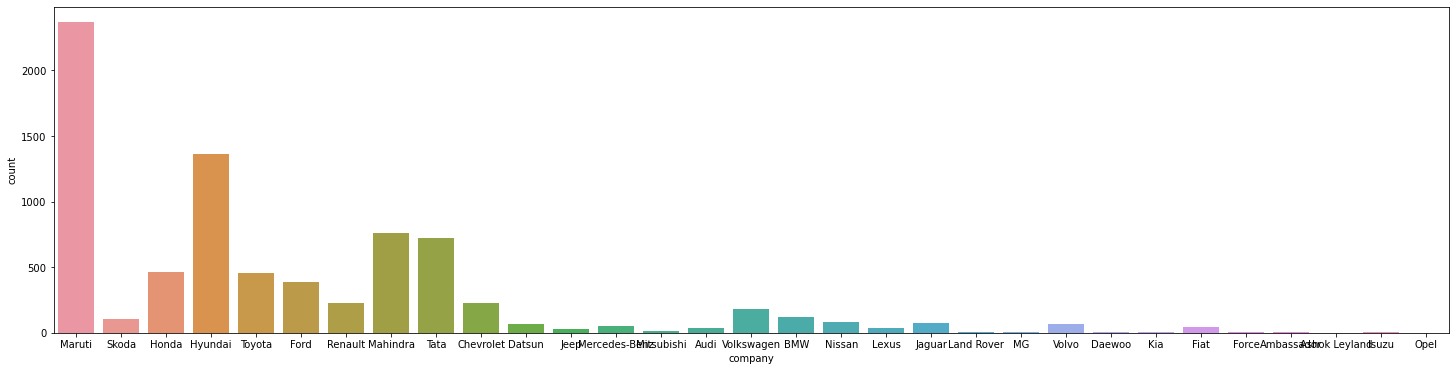

In [53]:
plt.figure(figsize=(25,6)) 

sns.countplot(data=df,x='company')

In [54]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'no_years',
       'company'],
      dtype='object')

In [55]:
feat_val =['selling_price', 'km_driven', 'engine', 'max_power', 'no_years']

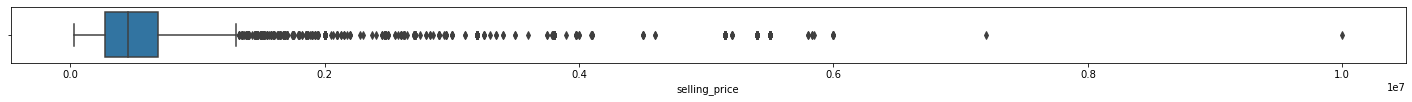

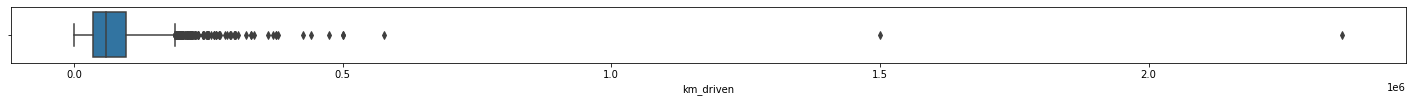

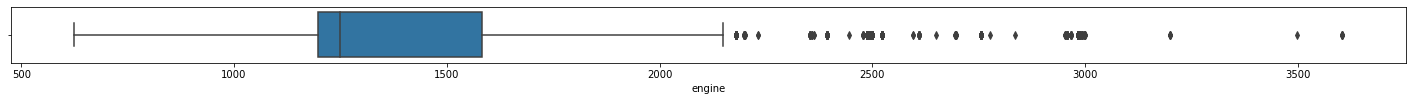

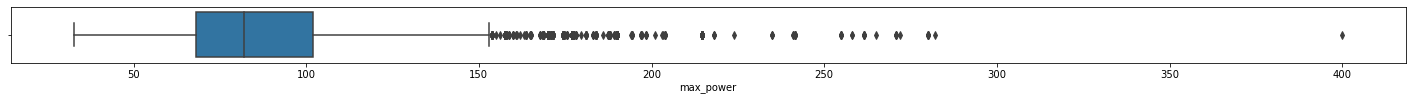

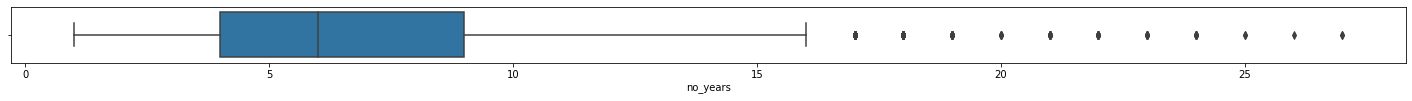

In [56]:
for i in range(len(feat_val)) :
    plt.figure(figsize=(25,6)) 
    plt.subplot(5,1,i+1)
    sns.boxplot(x=feat_val[i],data=df)
    plt.show()
    i += 1

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7901 non-null   int64  
 1   km_driven      7901 non-null   int64  
 2   fuel           7901 non-null   object 
 3   seller_type    7901 non-null   object 
 4   transmission   7901 non-null   object 
 5   owner          7901 non-null   object 
 6   mileage        7901 non-null   float64
 7   engine         7901 non-null   int32  
 8   max_power      7901 non-null   float64
 9   seats          7901 non-null   int32  
 10  no_years       7901 non-null   int64  
 11  company        7901 non-null   object 
dtypes: float64(2), int32(2), int64(3), object(5)
memory usage: 842.4+ KB


In [58]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0         450000     145500  Diesel  Individual       Manual   First Owner   
1         370000     120000  Diesel  Individual       Manual  Second Owner   
2         158000     140000  Petrol  Individual       Manual   Third Owner   
3         225000     127000  Diesel  Individual       Manual   First Owner   
4         130000     120000  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats  no_years  company  
0    23.40    1248      74.00      5         7   Maruti  
1    21.14    1498     103.52      5         7    Skoda  
2    17.70    1497      78.00      5        15    Honda  
3    23.00    1396      90.00      5        11  Hyundai  
4    16.10    1298      88.20      5        14   Maruti

In [59]:
df['selling_price'] = df['selling_price']/100000
df['km_driven'] = df['km_driven']/10000

In [60]:
df.groupby('company')['km_driven'].mean()

company
Ambassador        8.250000
Ashok Leyland    20.000000
Audi              5.710708
BMW               2.996047
Chevrolet         7.978537
Daewoo            8.131700
Datsun            3.634286
Fiat              8.315605
Force             5.554650
Ford              7.246946
Honda             6.001950
Hyundai           6.381215
Isuzu             4.556000
Jaguar            3.014789
Jeep              3.713300
Kia               1.000000
Land Rover        3.771467
Lexus             2.000000
MG                1.236667
Mahindra          9.067450
Maruti            6.356798
Mercedes-Benz     5.216261
Mitsubishi       14.046364
Nissan            7.239148
Opel             11.000000
Renault           5.905596
Skoda             7.108614
Tata              8.068778
Toyota           10.101644
Volkswagen        7.231070
Volvo             1.417164
Name: km_driven, dtype: float64

In [61]:
cost_order = df.groupby('company')['selling_price'].mean().sort_values(ascending=False).index.values

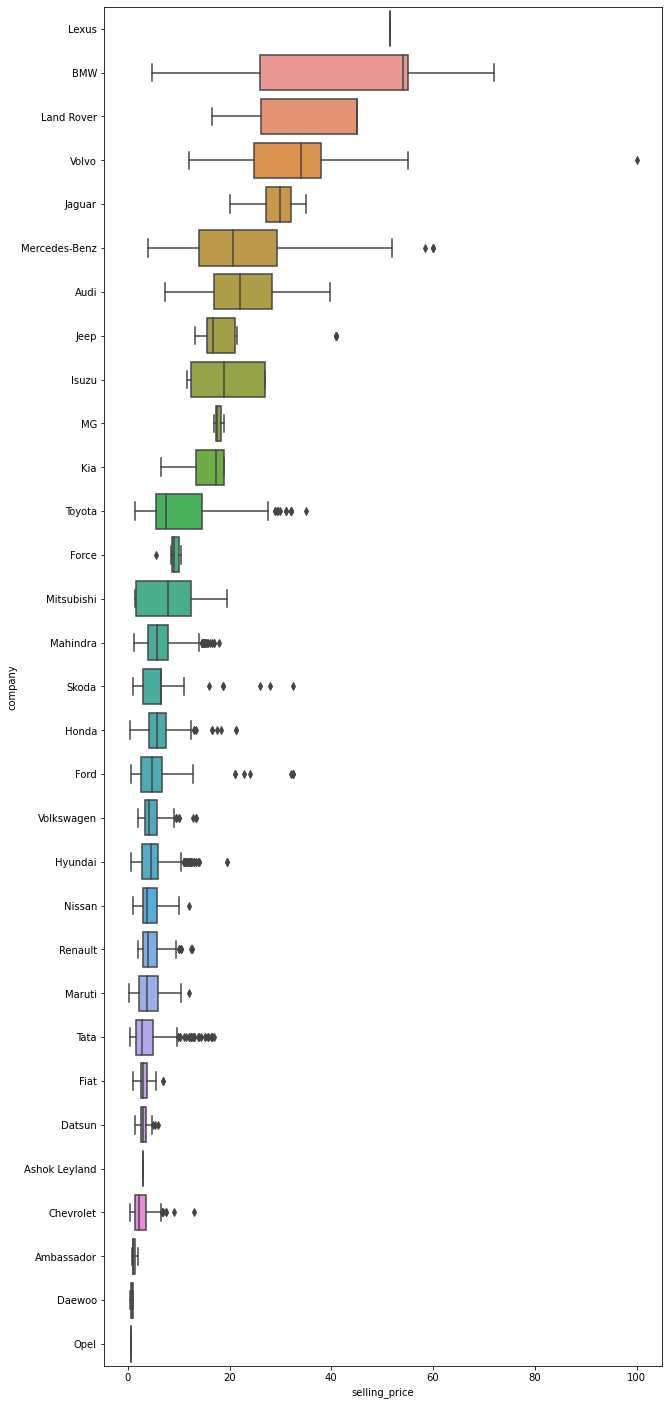

In [62]:

plt.figure(figsize=(10,25)) 
sns.boxplot(y='company',x='selling_price',data=df,order=cost_order)



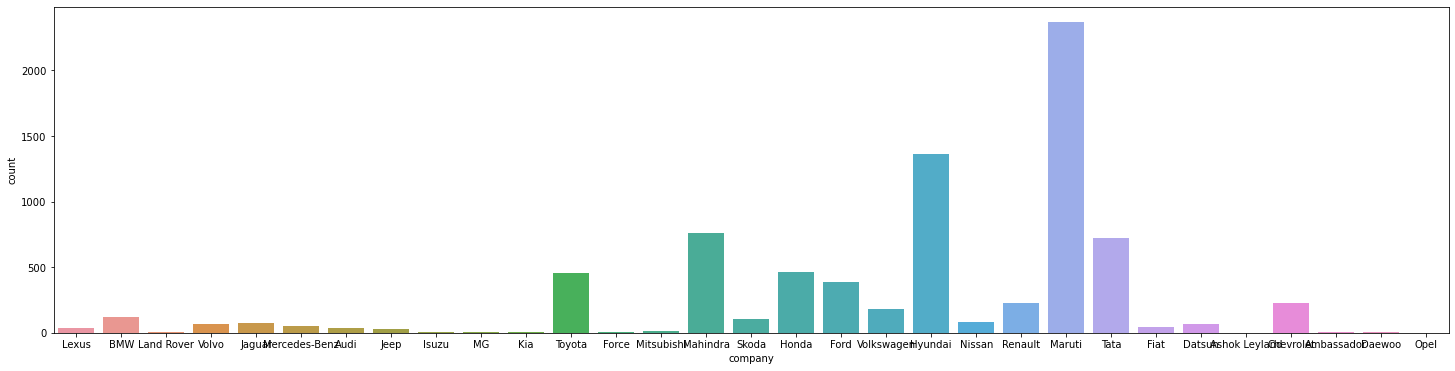

In [63]:
plt.figure(figsize=(25,6)) 
sns.countplot(data=df,x='company',order=cost_order)

In [64]:
df.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'no_years',
       'company'],
      dtype='object')

In [65]:

plx.box(y=df['fuel'],x=df['selling_price'])


In [66]:
plx.box(y=df['seller_type'],x=df['selling_price'])


In [67]:
plx.box(y=df['transmission'],x=df['selling_price'])


In [68]:
plx.box(y=df['owner'],x=df['selling_price'])


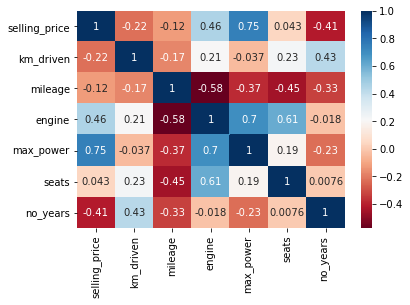

In [69]:
sns.heatmap(df.corr(),
           annot=True,
           cmap='RdBu')

In [70]:
plx.histogram(df,x='selling_price',
             nbins=50,
             color='fuel')

In [71]:
plx.histogram(df,x='owner')

In [72]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0           4.50      14.55  Diesel  Individual       Manual   First Owner   
1           3.70      12.00  Diesel  Individual       Manual  Second Owner   
2           1.58      14.00  Petrol  Individual       Manual   Third Owner   
3           2.25      12.70  Diesel  Individual       Manual   First Owner   
4           1.30      12.00  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats  no_years  company  
0    23.40    1248      74.00      5         7   Maruti  
1    21.14    1498     103.52      5         7    Skoda  
2    17.70    1497      78.00      5        15    Honda  
3    23.00    1396      90.00      5        11  Hyundai  
4    16.10    1298      88.20      5        14   Maruti

In [74]:
df_f = pd.get_dummies(df,drop_first=True)

In [75]:
df_f.head()

selling_price  km_driven  mileage  engine  max_power  seats  no_years  \
0           4.50      14.55    23.40    1248      74.00      5         7   
1           3.70      12.00    21.14    1498     103.52      5         7   
2           1.58      14.00    17.70    1497      78.00      5        15   
3           2.25      12.70    23.00    1396      90.00      5        11   
4           1.30      12.00    16.10    1298      88.20      5        14   

   fuel_Diesel  fuel_LPG  fuel_Petrol  ...  company_Mercedes-Benz  \
0            1         0            0  ...                      0   
1            1         0            0  ...                      0   
2            0         0            1  ...                      0   
3            1         0            0  ...                      0   
4            0         0            1  ...                      0   

   company_Mitsubishi  company_Nissan  company_Opel  company_Renault  \
0                   0               0             0                0   
1                   0               0             0                0   
2                   0               0             0                0   
3                   0               0             0                0   
4                   0               0             0                0   

   company_Skoda  company_Tata  company_Toyota  company_Volkswagen  \
0              0             0               0                   0   
1              1             0               0                   0   
2              0             0               0                   0   
3              0             0               0                   0   
4              0             0               0                   0   

   company_Volvo  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 46 columns]

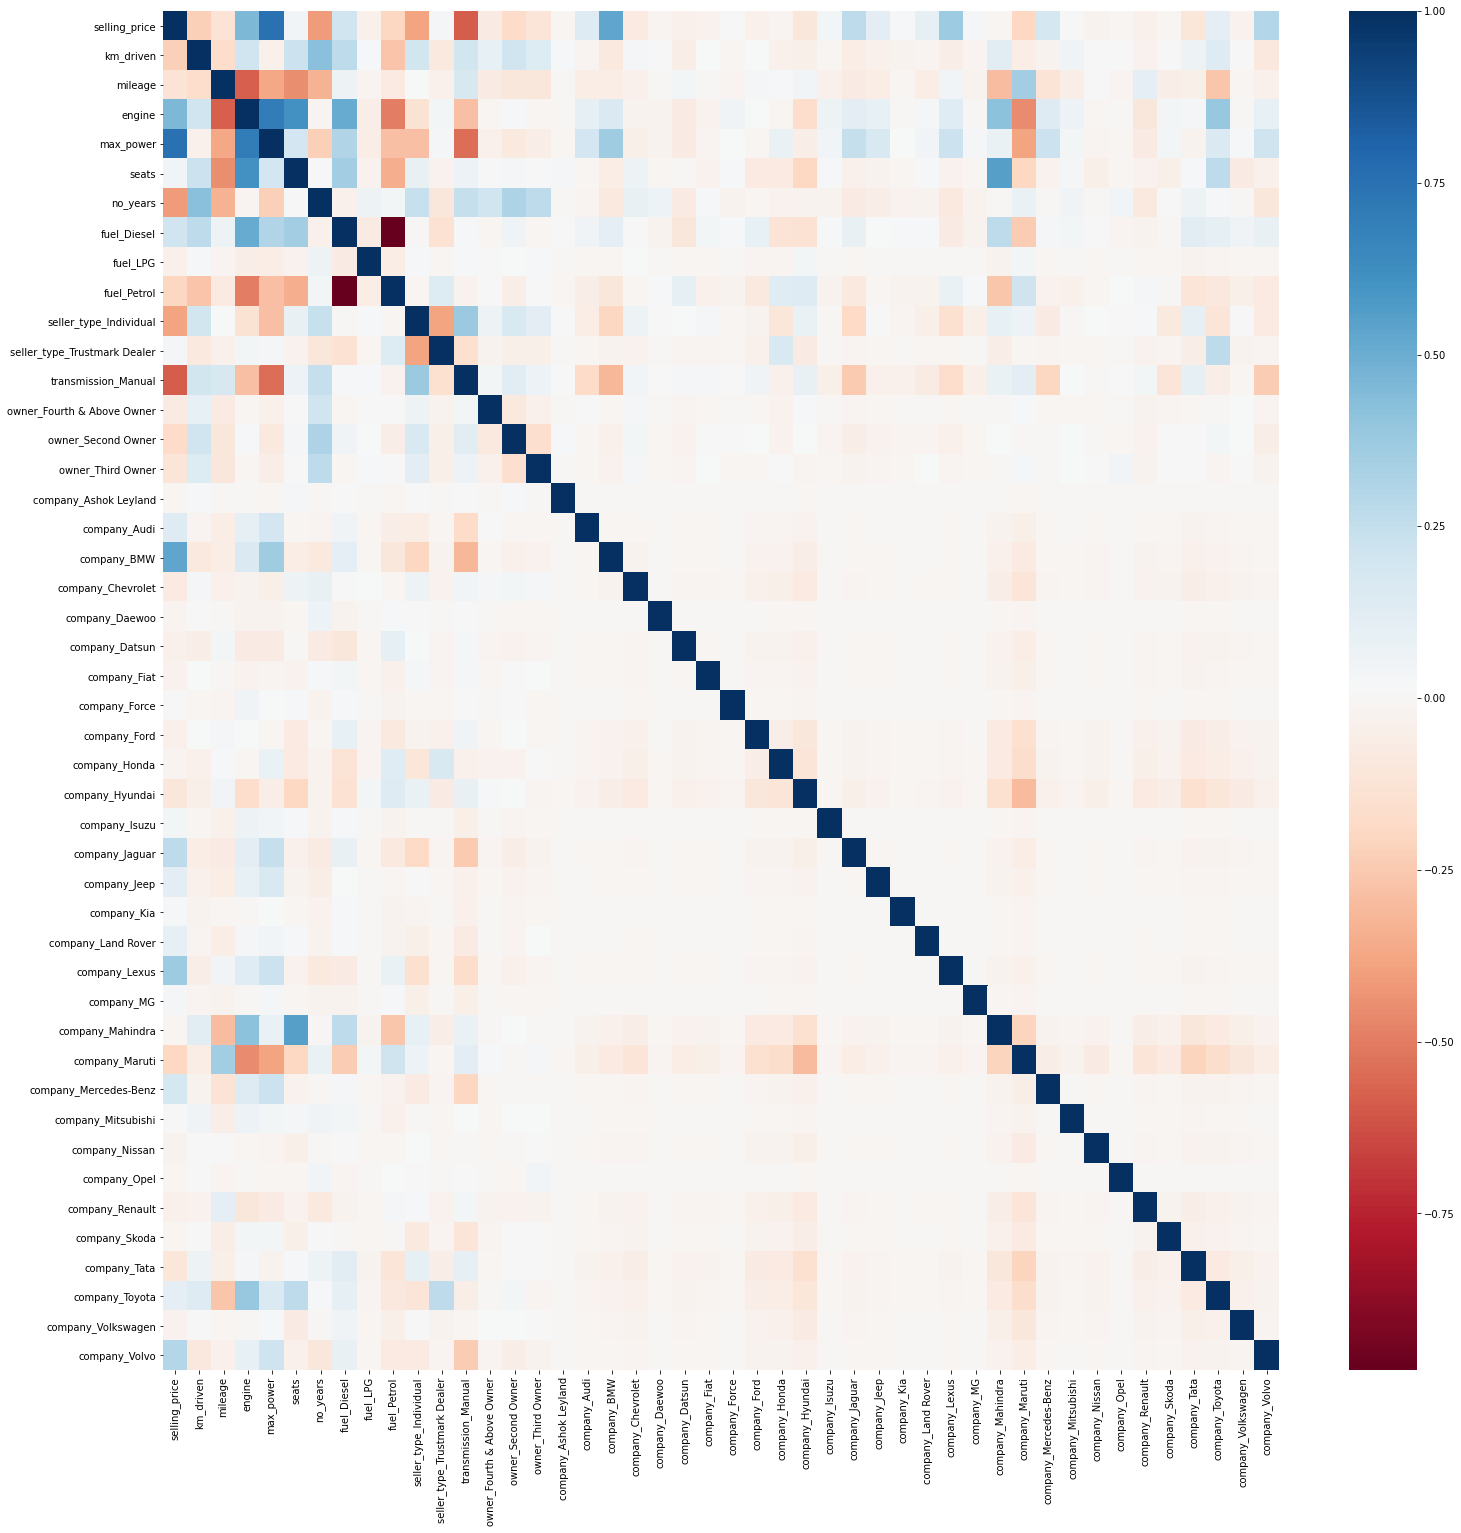

In [79]:
plt.figure(figsize=(25,25))
sns.heatmap(df_f.corr(),
           cmap='RdBu')

In [81]:
df_f.corr()['selling_price']

selling_price                   1.000000
km_driven                      -0.221468
mileage                        -0.124703
engine                          0.458041
max_power                       0.750357
seats                           0.043285
no_years                       -0.412519
fuel_Diesel                     0.209801
fuel_LPG                       -0.036115
fuel_Petrol                    -0.200025
seller_type_Individual         -0.383811
seller_type_Trustmark Dealer    0.033601
transmission_Manual            -0.589491
owner_Fourth & Above Owner     -0.073861
owner_Second Owner             -0.178739
owner_Third Owner              -0.115410
company_Ashok Leyland          -0.004848
company_Audi                    0.142237
company_BMW                     0.535456
company_Chevrolet              -0.080225
company_Daewoo                 -0.013788
company_Datsun                 -0.037596
company_Fiat                   -0.029581
company_Force                   0.008208
company_Ford    

In [376]:
df_f.head()

selling_price  km_driven  mileage  engine  max_power  seats  no_years  \
0           4.50      14.55    23.40    1248      74.00      5         7   
1           3.70      12.00    21.14    1498     103.52      5         7   
2           1.58      14.00    17.70    1497      78.00      5        15   
3           2.25      12.70    23.00    1396      90.00      5        11   
4           1.30      12.00    16.10    1298      88.20      5        14   

   fuel_Diesel  fuel_LPG  fuel_Petrol  ...  company_Mercedes-Benz  \
0            1         0            0  ...                      0   
1            1         0            0  ...                      0   
2            0         0            1  ...                      0   
3            1         0            0  ...                      0   
4            0         0            1  ...                      0   

   company_Mitsubishi  company_Nissan  company_Opel  company_Renault  \
0                   0               0             0                0   
1                   0               0             0                0   
2                   0               0             0                0   
3                   0               0             0                0   
4                   0               0             0                0   

   company_Skoda  company_Tata  company_Toyota  company_Volkswagen  \
0              0             0               0                   0   
1              1             0               0                   0   
2              0             0               0                   0   
3              0             0               0                   0   
4              0             0               0                   0   

   company_Volvo  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 46 columns]

In [377]:
X= df_f.iloc[:,1:]

In [378]:
y=df_f.iloc[:,0]

In [379]:
from sklearn.model_selection import train_test_split

In [380]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [381]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6320, 45)
(1581, 45)
(6320,)
(1581,)


In [96]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [114]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    
    plt.show()

Train R2-score : 0.85
Test R2-score : 0.85
Train CV scores : [0.87906044 0.85325169 0.83428123 0.86598461 0.78650975]
Train CV mean : 0.84


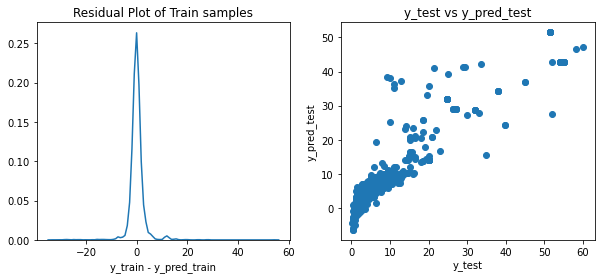

In [115]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.85
Test R2-score : 0.85
Train CV scores : [0.87773131 0.85184616 0.834427   0.86582841 0.78734109]
Train CV mean : 0.84


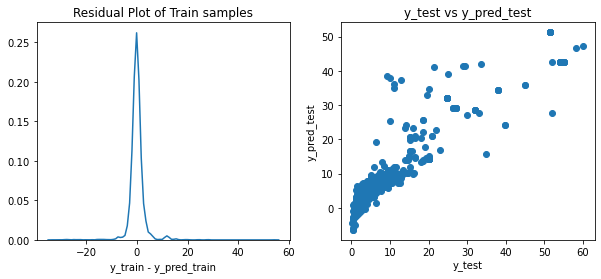

In [106]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 368.6492984756769, tolerance: 34.27556604482573

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.346246538043488, tolerance: 26.87794386531456

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 97.85618145339686, tolerance: 28.583165087801977

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

Train R2-score : 0.85
Test R2-score : 0.85
Train CV scores : [0.87452244 0.85202826 0.83562473 0.86651799 0.78701726]
Train CV mean : 0.84


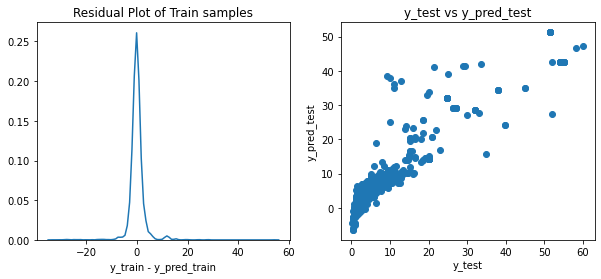

In [109]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.98
Test R2-score : 0.97
Train CV scores : [0.97080048 0.96169265 0.95161392 0.9627591  0.92391536]
Train CV mean : 0.95


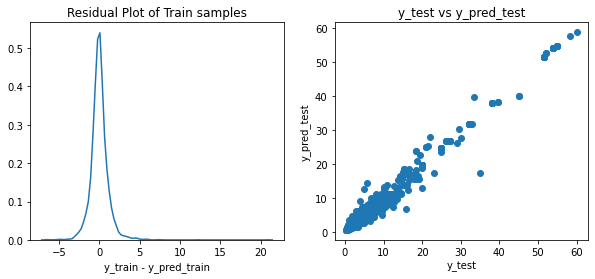

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

car_pred_model(rf_rs,'random_forest.pkl')

Train R2-score : 1.0
Test R2-score : 0.98
Train CV scores : [0.9776603  0.97268302 0.95703913 0.96822964 0.92399258]
Train CV mean : 0.96


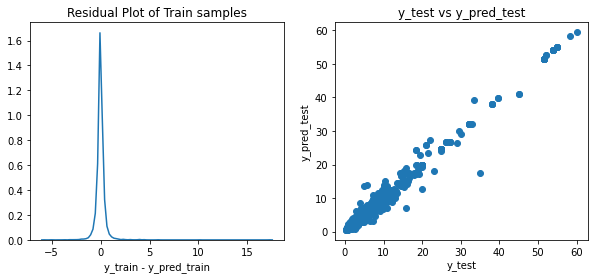

In [111]:


rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

car_pred_model(rf,'random_forest.pkl')

In [116]:
from sklearn.feature_selection import RFE

In [121]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', False, 30),
 ('mileage', False, 32),
 ('engine', False, 34),
 ('max_power', False, 29),
 ('seats', False, 33),
 ('no_years', False, 25),
 ('fuel_Diesel', False, 17),
 ('fuel_LPG', False, 22),
 ('fuel_Petrol', False, 24),
 ('seller_type_Individual', False, 20),
 ('seller_type_Trustmark Dealer', False, 23),
 ('transmission_Manual', False, 2),
 ('owner_Fourth & Above Owner', False, 27),
 ('owner_Second Owner', False, 18),
 ('owner_Third Owner', False, 26),
 ('company_Ashok Leyland', False, 35),
 ('company_Audi', True, 1),
 ('company_BMW', True, 1),
 ('company_Chevrolet', False, 4),
 ('company_Daewoo', False, 3),
 ('company_Datsun', False, 5),
 ('company_Fiat', False, 6),
 ('company_Force', False, 21),
 ('company_Ford', False, 14),
 ('company_Honda', False, 15),
 ('company_Hyundai', False, 13),
 ('company_Isuzu', True, 1),
 ('company_Jaguar', True, 1),
 ('company_Jeep', True, 1),
 ('company_Kia', False, 19),
 ('company_Land Rover', True, 1),
 ('company_Lexus', True, 1),
 ('c

In [123]:
col = X_train.columns[rfe.support_]
col

Index(['company_Audi', 'company_BMW', 'company_Isuzu', 'company_Jaguar',
       'company_Jeep', 'company_Land Rover', 'company_Lexus', 'company_MG',
       'company_Mercedes-Benz', 'company_Volvo'],
      dtype='object')

In [124]:
X_train_rfe = X_train[col]

In [130]:
import statsmodels.api as sm
X_train_rfe= sm.add_constant(X_train_rfe)

ModuleNotFoundError: No module named 'statsmodels'

In [303]:
df.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0           4.50      14.55  Diesel  Individual       Manual   First Owner   
1           3.70      12.00  Diesel  Individual       Manual  Second Owner   
2           1.58      14.00  Petrol  Individual       Manual   Third Owner   
3           2.25      12.70  Diesel  Individual       Manual   First Owner   
4           1.30      12.00  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats  no_years  company  
0    23.40    1248      74.00      5         7   Maruti  
1    21.14    1498     103.52      5         7    Skoda  
2    17.70    1497      78.00      5        15    Honda  
3    23.00    1396      90.00      5        11  Hyundai  
4    16.10    1298      88.20      5        14   Maruti

In [304]:
df_s = df.drop('company',axis=1)

In [305]:
df_s.head()

selling_price  km_driven    fuel seller_type transmission         owner  \
0           4.50      14.55  Diesel  Individual       Manual   First Owner   
1           3.70      12.00  Diesel  Individual       Manual  Second Owner   
2           1.58      14.00  Petrol  Individual       Manual   Third Owner   
3           2.25      12.70  Diesel  Individual       Manual   First Owner   
4           1.30      12.00  Petrol  Individual       Manual   First Owner   

   mileage  engine  max_power  seats  no_years  
0    23.40    1248      74.00      5         7  
1    21.14    1498     103.52      5         7  
2    17.70    1497      78.00      5        15  
3    23.00    1396      90.00      5        11  
4    16.10    1298      88.20      5        14

In [306]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [307]:
df_s.loc[df['owner']=='Fourth & Above Owner','owner'] = 4

In [308]:
df_s.loc[df['owner']=='First Owner','owner'] = 1


In [309]:
df_s.loc[df['owner']=='Second Owner','owner'] = 2
df_s.loc[df['owner']=='Third Owner','owner'] = 3

In [310]:
df_s['owner'].unique()

array([1, 2, 3, 4], dtype=object)

In [311]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   selling_price  7901 non-null   float64
 1   km_driven      7901 non-null   float64
 2   fuel           7901 non-null   object 
 3   seller_type    7901 non-null   object 
 4   transmission   7901 non-null   object 
 5   owner          7901 non-null   object 
 6   mileage        7901 non-null   float64
 7   engine         7901 non-null   int32  
 8   max_power      7901 non-null   float64
 9   seats          7901 non-null   int32  
 10  no_years       7901 non-null   int64  
dtypes: float64(4), int32(2), int64(1), object(4)
memory usage: 811.5+ KB


In [312]:
df_s['owner'] = df_s['owner'].astype(int)

In [313]:
df_s.head()

selling_price  km_driven    fuel seller_type transmission  owner  mileage  \
0           4.50      14.55  Diesel  Individual       Manual      1    23.40   
1           3.70      12.00  Diesel  Individual       Manual      2    21.14   
2           1.58      14.00  Petrol  Individual       Manual      3    17.70   
3           2.25      12.70  Diesel  Individual       Manual      1    23.00   
4           1.30      12.00  Petrol  Individual       Manual      1    16.10   

   engine  max_power  seats  no_years  
0    1248      74.00      5         7  
1    1498     103.52      5         7  
2    1497      78.00      5        15  
3    1396      90.00      5        11  
4    1298      88.20      5        14

In [314]:
df_s_fin = pd.get_dummies(df_s,drop_first=True)

In [315]:
df_s_fin.head()

selling_price  km_driven  owner  mileage  engine  max_power  seats  \
0           4.50      14.55      1    23.40    1248      74.00      5   
1           3.70      12.00      2    21.14    1498     103.52      5   
2           1.58      14.00      3    17.70    1497      78.00      5   
3           2.25      12.70      1    23.00    1396      90.00      5   
4           1.30      12.00      1    16.10    1298      88.20      5   

   no_years  fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0         7            1         0            0                       1   
1         7            1         0            0                       1   
2        15            0         0            1                       1   
3        11            1         0            0                       1   
4        14            0         0            1                       1   

   seller_type_Trustmark Dealer  transmission_Manual  
0                             0                    1  
1                             0                    1  
2                             0                    1  
3                             0                    1  
4                             0                    1

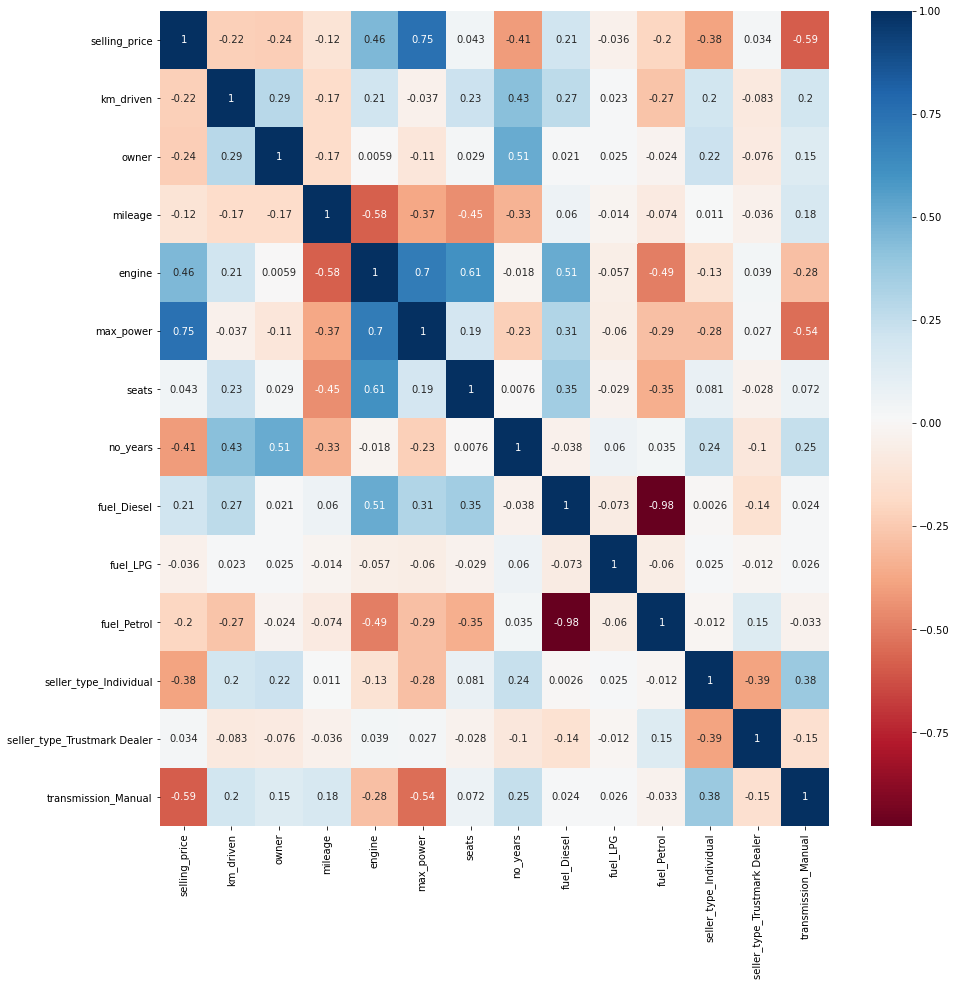

In [316]:
plt.figure(figsize=(15,15))
sns.heatmap(df_s_fin.corr(),
           annot=True,
           cmap='RdBu')

In [317]:
df_s_fin.iloc[:,0]

0       4.50
1       3.70
2       1.58
3       2.25
4       1.30
        ... 
8123    3.20
8124    1.35
8125    3.82
8126    2.90
8127    2.90
Name: selling_price, Length: 7901, dtype: float64

In [318]:
df_s_fin.iloc[:,1]

0       14.55
1       12.00
2       14.00
3       12.70
4       12.00
        ...  
8123    11.00
8124    11.90
8125    12.00
8126     2.50
8127     2.50
Name: km_driven, Length: 7901, dtype: float64

In [319]:
X_s = df_s_fin.iloc[:,1:]

In [320]:
y_s = df_s_fin.iloc[:,0]

In [321]:
X_s_train , X_s_test, y_s_train, y_s_test = train_test_split(X_s,y_s,test_size=0.2,random_state=1)

In [322]:
X_s_train

km_driven  owner  mileage  engine  max_power  seats  no_years  \
6512        1.0      2    17.00    1497     121.31      5         2   
3514       10.0      1    21.10     814      55.20      5         4   
7167        5.7      1    17.80    1198      86.70      5         4   
4946        2.6      1    19.40    1198      86.80      5         9   
4439        7.0      1    19.00    1248      90.00      5        10   
...         ...    ...      ...     ...        ...    ...       ...   
933        11.0      1    25.44     936      57.60      5         9   
5343        3.0      1    20.92     998      67.10      5        10   
4103        7.0      1    18.60    1199      79.40      5        11   
244         7.0      1    12.99    2494     100.57      7         8   
5306        3.0      1    14.99    1498     104.50      5         3   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
6512            0         0            1                       1   
3514            0         0            1                       1   
7167            0         0            1                       1   
4946            0         0            1                       1   
4439            1         0            0                       1   
...           ...       ...          ...                     ...   
933             1         0            0                       1   
5343            0         0            1                       1   
4103            0         0            1                       1   
244             1         0            0                       1   
5306            0         0            1                       1   

      seller_type_Trustmark Dealer  transmission_Manual  
6512                             0                    1  
3514                             0                    1  
7167                             0                    1  
4946                             0                    1  
4439                             0                    1  
...                            ...                  ...  
933                              0                    1  
5343                             0                    1  
4103                             0                    1  
244                              0                    1  
5306                             0                    0  

[6320 rows x 13 columns]

In [323]:
X_s_test.iloc[:, :7]

km_driven  owner  mileage  engine  max_power  seats  no_years
624      2.0000      1    24.00    1186      73.97      5         2
5679    12.0000      2    23.59    1364      67.04      5         4
2692    12.0000      1    28.40    1248      74.02      5         3
5757     7.0000      1    13.50    1799     130.00      5        12
1024    12.0000      3    16.80    1405      68.00      5        13
...         ...    ...      ...     ...        ...    ...       ...
3191     2.3700      1    20.40    1197      81.80      5         5
705      1.7000      1    21.10     814      55.20      5         6
4406     3.5000      1    21.14    1498     103.52      5         6
7750     6.5204      1    23.10     998      67.04      5         7
1110     0.7500      1    16.78    1995     190.00      5         2

[1581 rows x 7 columns]

In [324]:
[[y_s_train]]

[[6512    8.85
  3514    2.65
  7167    4.75
  4946    3.76
  4439    2.50
          ... 
  933     1.50
  5343    2.25
  4103    1.50
  244     7.00
  5306    9.00
  Name: selling_price, Length: 6320, dtype: float64]]

In [290]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_s_train.iloc[:, :7] = sc.fit_transform(X_s_train.iloc[:, :7])
X_s_test.iloc[:, :7] = sc.transform(X_s_test.iloc[:, :7])


c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [325]:
X_s_train

km_driven  owner  mileage  engine  max_power  seats  no_years  \
6512        1.0      2    17.00    1497     121.31      5         2   
3514       10.0      1    21.10     814      55.20      5         4   
7167        5.7      1    17.80    1198      86.70      5         4   
4946        2.6      1    19.40    1198      86.80      5         9   
4439        7.0      1    19.00    1248      90.00      5        10   
...         ...    ...      ...     ...        ...    ...       ...   
933        11.0      1    25.44     936      57.60      5         9   
5343        3.0      1    20.92     998      67.10      5        10   
4103        7.0      1    18.60    1199      79.40      5        11   
244         7.0      1    12.99    2494     100.57      7         8   
5306        3.0      1    14.99    1498     104.50      5         3   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
6512            0         0            1                       1   
3514            0         0            1                       1   
7167            0         0            1                       1   
4946            0         0            1                       1   
4439            1         0            0                       1   
...           ...       ...          ...                     ...   
933             1         0            0                       1   
5343            0         0            1                       1   
4103            0         0            1                       1   
244             1         0            0                       1   
5306            0         0            1                       1   

      seller_type_Trustmark Dealer  transmission_Manual  
6512                             0                    1  
3514                             0                    1  
7167                             0                    1  
4946                             0                    1  
4439                             0                    1  
...                            ...                  ...  
933                              0                    1  
5343                             0                    1  
4103                             0                    1  
244                              0                    1  
5306                             0                    0  

[6320 rows x 13 columns]

In [327]:
X_s_test

km_driven  owner  mileage  engine  max_power  seats  no_years  \
624      2.0000      1    24.00    1186      73.97      5         2   
5679    12.0000      2    23.59    1364      67.04      5         4   
2692    12.0000      1    28.40    1248      74.02      5         3   
5757     7.0000      1    13.50    1799     130.00      5        12   
1024    12.0000      3    16.80    1405      68.00      5        13   
...         ...    ...      ...     ...        ...    ...       ...   
3191     2.3700      1    20.40    1197      81.80      5         5   
705      1.7000      1    21.10     814      55.20      5         6   
4406     3.5000      1    21.14    1498     103.52      5         6   
7750     6.5204      1    23.10     998      67.04      5         7   
1110     0.7500      1    16.78    1995     190.00      5         2   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
624             1         0            0                       1   
5679            1         0            0                       1   
2692            1         0            0                       1   
5757            0         0            1                       1   
1024            1         0            0                       1   
...           ...       ...          ...                     ...   
3191            0         0            1                       1   
705             0         0            1                       1   
4406            1         0            0                       1   
7750            0         0            1                       0   
1110            1         0            0                       0   

      seller_type_Trustmark Dealer  transmission_Manual  
624                              0                    1  
5679                             0                    1  
2692                             0                    1  
5757                             0                    1  
1024                             0                    1  
...                            ...                  ...  
3191                             0                    1  
705                              0                    1  
4406                             0                    1  
7750                             1                    0  
1110                             0                    0  

[1581 rows x 13 columns]

In [328]:
lm = LinearRegression()

In [329]:
lm.fit(X_s_train, y_s_train)

LinearRegression()

In [330]:
predictions_linear = lm.predict(X_s_test)

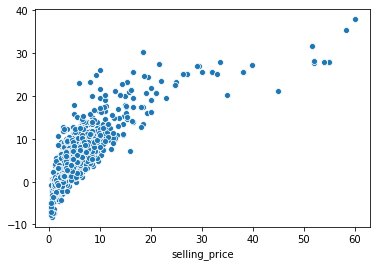

In [331]:
sns.scatterplot(x=y_s_test,y=predictions_linear)

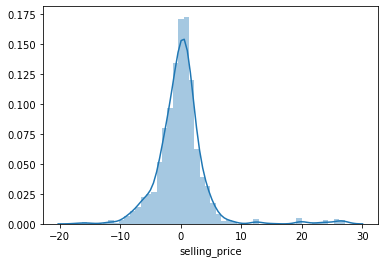

In [332]:
sns.distplot((y_s_test-predictions_linear))

In [333]:
CV = []
R2_train = []
R2_test = []
y_pred_train = lm.predict(X_s_train)
R2_train_model = r2_score(y_s_train,y_pred_train)
    
R2_train.append(round(R2_train_model,2))
    

R2_test_model = r2_score(y_s_test,predictions_linear)
R2_test.append(round(R2_test_model,2))
    

cross_val = cross_val_score(lm ,X_s_train ,y_s_train ,cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

print("Train R2-score :",round(R2_train_model,2))
print("Test R2-score :",round(R2_test_model,2))
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))

Train R2-score : 0.68
Test R2-score : 0.68
Train CV scores : [0.68796214 0.65896379 0.68918505 0.68079275 0.66709235]
Train CV mean : 0.68


In [336]:
lm.coef_

array([-9.88079579e-02, -1.71409151e-01,  1.25622638e-01,  8.83908607e-04,
        1.27666820e-01, -4.16644247e-01, -3.32141743e-01, -3.14944010e-01,
        1.68534142e+00, -8.49849418e-01, -2.42568071e+00, -3.40747111e+00,
       -4.49383310e+00])

In [390]:
random_forest = RandomForestRegressor(n_estimators = 100, random_state = 42)
random_forest.fit(X_s_train, y_s_train)
predictions_linear = random_forest.predict(X_s_test)

In [399]:

from sklearn.feature_selection import SelectFromModel


In [401]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100,random_state = 42))
sel.fit(X_s_train, y_s_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=42))

In [402]:
sel.get_support()


array([False, False, False, False,  True, False,  True, False])

In [403]:
X_s_train.columns[(sel.get_support())]

Index(['max_power', 'no_years'], dtype='object')

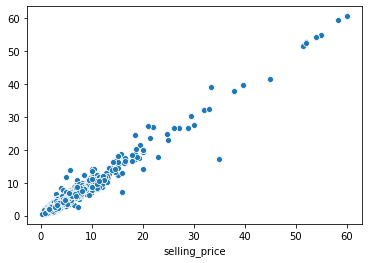

In [391]:
sns.scatterplot(x=y_s_test,y=predictions_linear)

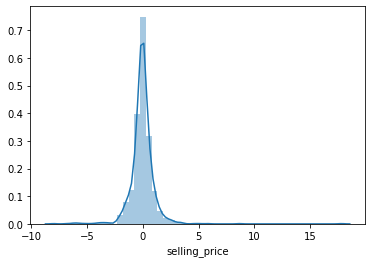

In [392]:
sns.distplot((y_s_test-predictions_linear))

In [393]:
CV = []
R2_train = []
R2_test = []
y_pred_train = random_forest.predict(X_s_train)
R2_train_model = r2_score(y_s_train,y_pred_train)
    
R2_train.append(round(R2_train_model,2))
    

R2_test_model = r2_score(y_s_test,predictions_linear)
R2_test.append(round(R2_test_model,2))
    

cross_val = cross_val_score(random_forest ,X_s_train ,y_s_train ,cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

print("Train R2-score :",round(R2_train_model,2))
print("Test R2-score :",round(R2_test_model,2))
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))

Train R2-score : 1.0
Test R2-score : 0.98
Train CV scores : [0.97699058 0.96977943 0.96201525 0.97098432 0.9249654 ]
Train CV mean : 0.96


In [407]:
rfe=RFE(lm,10)
rfe = rfe.fit(X_s_train,y_s_train)

In [408]:
X_s_train.columns[rfe.support_]

Index(['km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'no_years', 'fuel_Diesel'],
      dtype='object')

In [409]:
X_s_train.columns

Index(['km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats',
       'no_years', 'fuel_Diesel'],
      dtype='object')

In [350]:
tryyy = ['owner', 'max_power', 'seats', 'no_years', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual']

In [356]:
df_s.corr()['selling_price'].sort_values(ascending=False)

selling_price    1.000000
max_power        0.750357
engine           0.458041
seats            0.043285
mileage         -0.124703
km_driven       -0.221468
owner           -0.235119
no_years        -0.412519
Name: selling_price, dtype: float64

In [359]:
X_s_train = X_s_train[tryyy]

In [360]:
X_s_test = X_s_test[tryyy]

km_driven  owner  mileage  engine  max_power  seats  no_years  \
624      2.0000      1    24.00    1186      73.97      5         2   
5679    12.0000      2    23.59    1364      67.04      5         4   
2692    12.0000      1    28.40    1248      74.02      5         3   
5757     7.0000      1    13.50    1799     130.00      5        12   
1024    12.0000      3    16.80    1405      68.00      5        13   
...         ...    ...      ...     ...        ...    ...       ...   
3191     2.3700      1    20.40    1197      81.80      5         5   
705      1.7000      1    21.10     814      55.20      5         6   
4406     3.5000      1    21.14    1498     103.52      5         6   
7750     6.5204      1    23.10     998      67.04      5         7   
1110     0.7500      1    16.78    1995     190.00      5         2   

      fuel_Diesel  
624             1  
5679            1  
2692            1  
5757            0  
1024            1  
...           ...  
3191            0  
705             0  
4406            1  
7750            0  
1110            1  

[1581 rows x 8 columns]

In [363]:
lm = LinearRegression()
lm.fit(X_s_train, y_s_train)
predictions_linear = lm.predict(X_s_test)

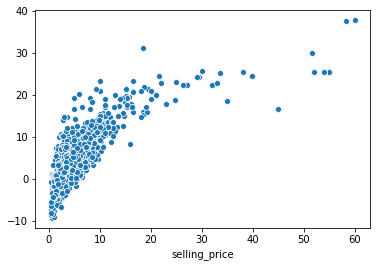

In [364]:
sns.scatterplot(x=y_s_test,y=predictions_linear)

In [365]:
CV = []
R2_train = []
R2_test = []
y_pred_train = lm.predict(X_s_train)
R2_train_model = r2_score(y_s_train,y_pred_train)
    
R2_train.append(round(R2_train_model,2))
    

R2_test_model = r2_score(y_s_test,predictions_linear)
R2_test.append(round(R2_test_model,2))
    

cross_val = cross_val_score(lm ,X_s_train ,y_s_train ,cv=5)
cv_mean = cross_val.mean()
CV.append(round(cv_mean,2))

print("Train R2-score :",round(R2_train_model,2))
print("Test R2-score :",round(R2_test_model,2))
print("Train CV scores :",cross_val)
print("Train CV mean :",round(cv_mean,2))

Train R2-score : 0.65
Test R2-score : 0.63
Train CV scores : [0.64406031 0.60814142 0.65880306 0.64484614 0.63993136]
Train CV mean : 0.64


In [383]:
X_s

km_driven  owner  mileage  engine  max_power  seats  no_years  \
0         14.55      1    23.40    1248      74.00      5         7   
1         12.00      2    21.14    1498     103.52      5         7   
2         14.00      3    17.70    1497      78.00      5        15   
3         12.70      1    23.00    1396      90.00      5        11   
4         12.00      1    16.10    1298      88.20      5        14   
...         ...    ...      ...     ...        ...    ...       ...   
8123      11.00      1    18.50    1197      82.85      5         8   
8124      11.90      4    16.80    1493     110.00      5        14   
8125      12.00      1    19.30    1248      73.90      5        12   
8126       2.50      1    23.57    1396      70.00      5         8   
8127       2.50      1    23.57    1396      70.00      5         8   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0               1         0            0                       1   
1               1         0            0                       1   
2               0         0            1                       1   
3               1         0            0                       1   
4               0         0            1                       1   
...           ...       ...          ...                     ...   
8123            0         0            1                       1   
8124            1         0            0                       1   
8125            1         0            0                       1   
8126            1         0            0                       1   
8127            1         0            0                       1   

      seller_type_Trustmark Dealer  transmission_Manual  
0                                0                    1  
1                                0                    1  
2                                0                    1  
3                                0                    1  
4                                0                    1  
...                            ...                  ...  
8123                             0                    1  
8124                             0                    1  
8125                             0                    1  
8126                             0                    1  
8127                             0                    1  

[7901 rows x 13 columns]